<a href="https://colab.research.google.com/github/Subham15-11/paisabazaar/blob/main/Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name**    -  Paisabazaar Banking Fraud Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Subham15-11/paisabazaar/blob/main/Sample_ML_Submission_Template.ipynb

# **Problem Statement**


Paisabazaar is a financial services company that assists customers in finding and applying for various banking and credit products. An integral part of their service is assessing the creditworthiness of individuals, which is crucial for both loan approval and risk management. The credit score of a person is a significant metric used by financial institutions to determine the likelihood that an individual will repay their loans or credit balances. Accurate classification of credit scores can help Paisabazaar enhance their credit assessment processes, reduce the risk of loan defaults, and offer personalized financial advice to their customers.

In this context, analyzing and classifying credit scores based on customer data can improve decision-making processes and contribute to better financial product recommendations. This case study aims to develop a model that predicts the credit score of individuals based on various features, such as income, credit card usage, and payment behavior.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import gdown

### Dataset Loading

### Dataset First View

In [2]:
# Load Dataset
# Google Drive file ID
file_id = "140RGV1jfGe2MDK5ROsKBX5f3Da70Eq3A"
url = f"https://drive.google.com/uc?id={file_id}"

# Save with correct extension
output = "dataset.csv"
gdown.download(url, output, quiet=False)

# Load CSV
df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=140RGV1jfGe2MDK5ROsKBX5f3Da70Eq3A
To: /content/dataset.csv
100%|██████████| 30.8M/30.8M [00:00<00:00, 50.5MB/s]


In [3]:
# Dataset First Look
df.head()
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(100000, 28)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


<Axes: >

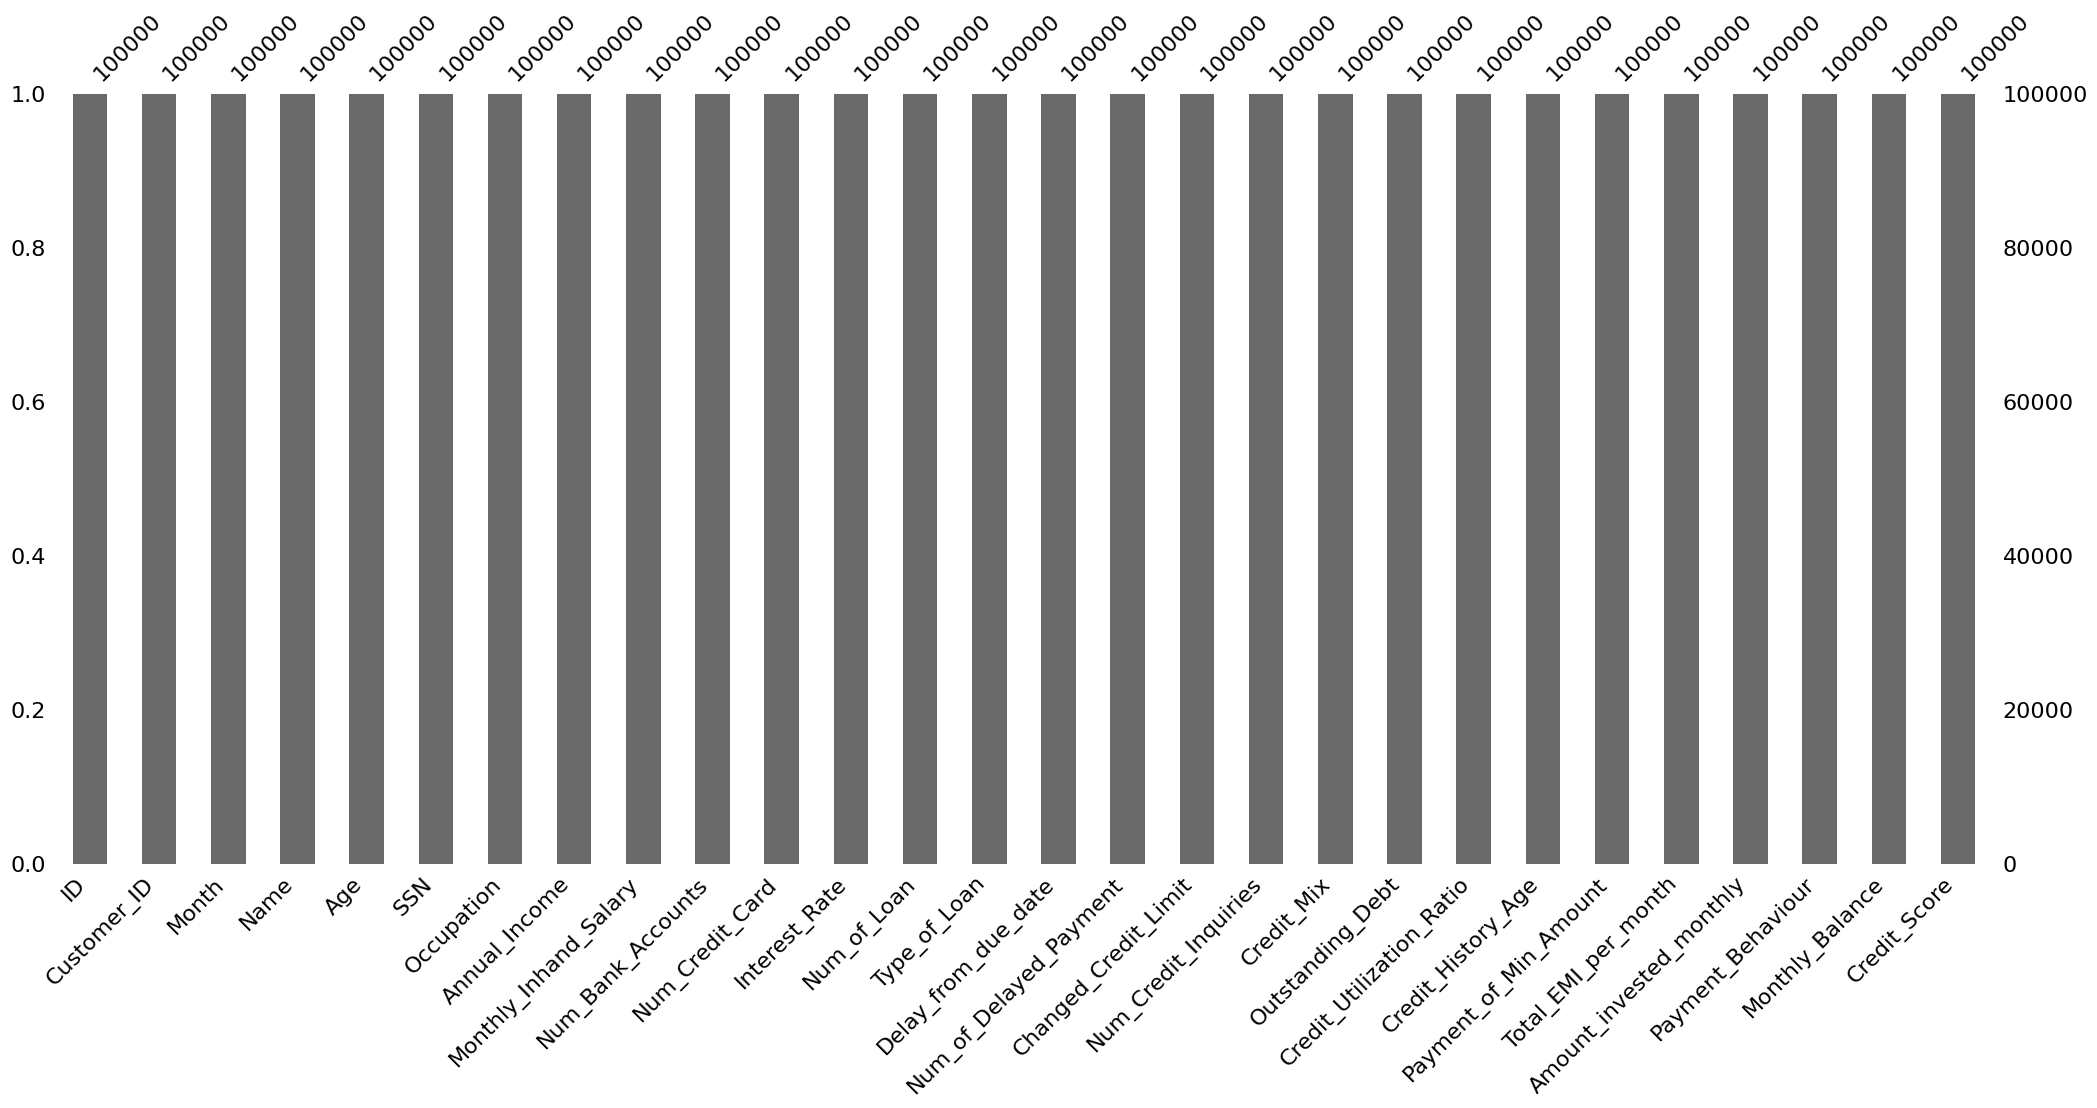

In [8]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

### What did you know about your dataset?

 The dataset contains 100,000 rows and 28 columns.It is a structured tabular dataset with both categorical and numerical features.There are no columns filled entirely with null values.The dataset includes identifiers (ID, Customer_ID, Name, SSN) that are unique or customer-specific and not useful as predictors,demographic details (Age, Occupation), financial indicators (Annual_Income, Monthly_Inhand_Salary), credit behavior features (Num_Bank_Accounts, Num_Credit_Card), and categorical behavior-related attributes (Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour).The target variable is Credit_Score, which has 3 unique classes.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Variables Description

Answer Here

In [11]:
print(df.nunique())

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64


In [12]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'ID':
[  5634   5635   5636 ... 155627 155628 155629]

Unique values for column 'Customer_ID':
[ 3392  8625 11708 ... 44897 34304 37932]

Unique values for column 'Month':
[1 2 3 4 5 6 7 8]

Unique values for column 'Name':
['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

Unique values for column 'Age':
[23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.]

Unique values for column 'SSN':
[8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]

Unique values for column 'Occupation':
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']

Unique values for column 'Annual_Income':
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  3962

### Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

#Drop identifier columns
drop_cols = ["ID", "Customer_ID", "Name", "SSN"]
df = df.drop(columns=drop_cols, errors='ignore')
# df.shape
print(df.head())
# Remove Duplicates
df.drop_duplicates(inplace=True)
df.shape

   Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      1  23.0  Scientist       19114.12            1824.843333   
1      2  23.0  Scientist       19114.12            1824.843333   
2      3  23.0  Scientist       19114.12            1824.843333   
3      4  23.0  Scientist       19114.12            1824.843333   
4      5  23.0  Scientist       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                3.0              4.0            3.0          4.0   
1                3.0              4.0            3.0          4.0   
2                3.0              4.0            3.0          4.0   
3                3.0              4.0            3.0          4.0   
4                3.0              4.0            3.0          4.0   

                                        Type_of_Loan  ...  Credit_Mix  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
1  Auto Loan, Credit-Builder Loan, P

(100000, 24)

### What all manipulations have you done and insights you found?



1.   Drop identifier columns
2.   Remove Duplicates



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-573984099.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score", data=df, palette="Set2")


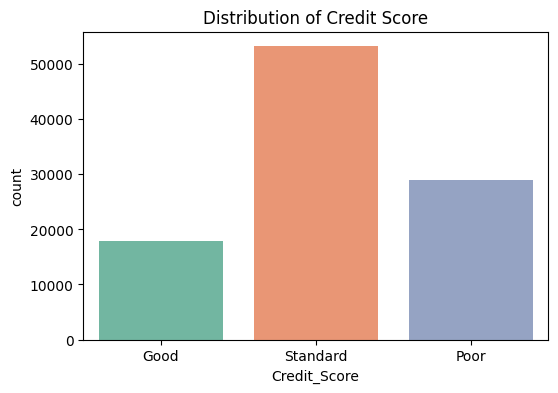

In [14]:
# Chart - 1 visualization code
# Credit score distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Credit_Score", data=df, palette="Set2")
plt.title("Distribution of Credit Score")
plt.show()

##### 1. Why did you pick the specific chart?

Check if the dataset is balanced across the 3 classes of Credit_Score, as Credit_Score is target variable.

##### 2. What is/are the insight(s) found from the chart?


All three classes are not balance,Standard is so high and good is too low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The target variable distribution will help create a positive business impact, because they allow the company to proactively manage customer risk, optimize loan disbursal, and boost overall profitability.

#### Chart - 2

/tmp/ipython-input-83361295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Payment_Behaviour", y="Monthly_Inhand_Salary", palette="Set2")


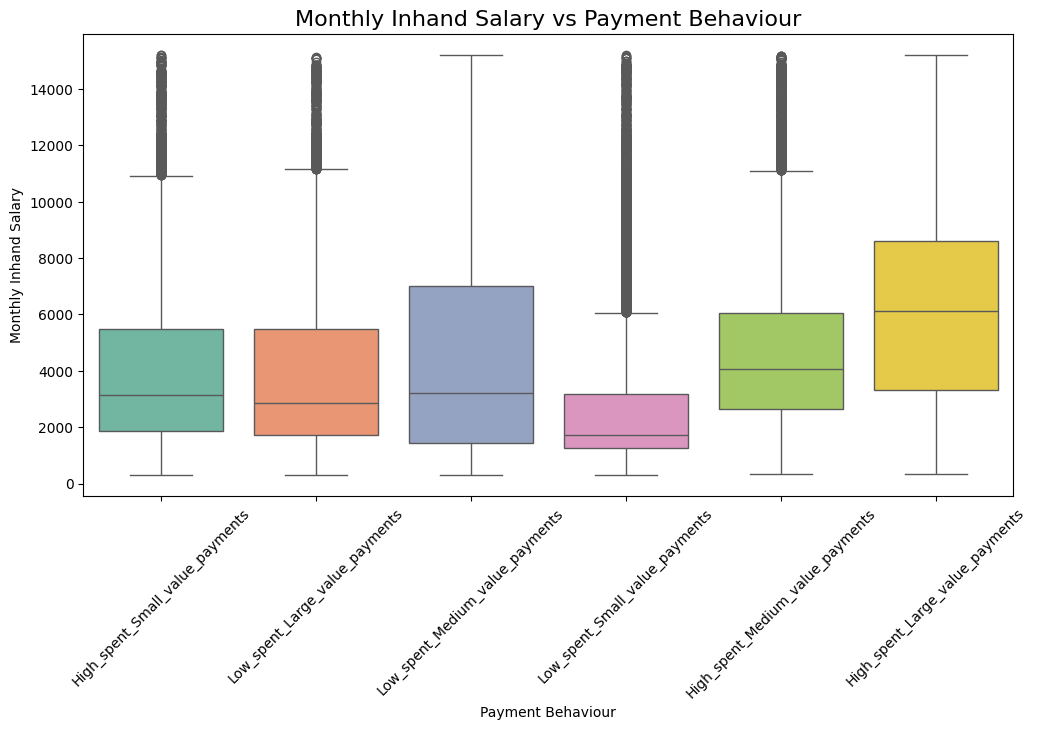

In [15]:
# Chart - 2 visualization code
# payment behavior vs Monthly salary
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Payment_Behaviour", y="Monthly_Inhand_Salary", palette="Set2")

plt.title("Monthly Inhand Salary vs Payment Behaviour", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Monthly Inhand Salary")
plt.xlabel("Payment Behaviour")
plt.show()

##### 1. Why did you pick the specific chart?

Understanding the payment behavior with monthly salary.

##### 2. What is/are the insight(s) found from the chart?

High spent large value payments has higher median than low spent small value payment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



1.   How salary levels influence payment behavior
2.   Customers with higher in-hand salaries but consistent “Delays” may need closer monitoring than lower-income customers with consistent “On Time” payments.



#### Chart - 3

/tmp/ipython-input-2703657286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Occupation", y="Annual_Income", palette="Set3")


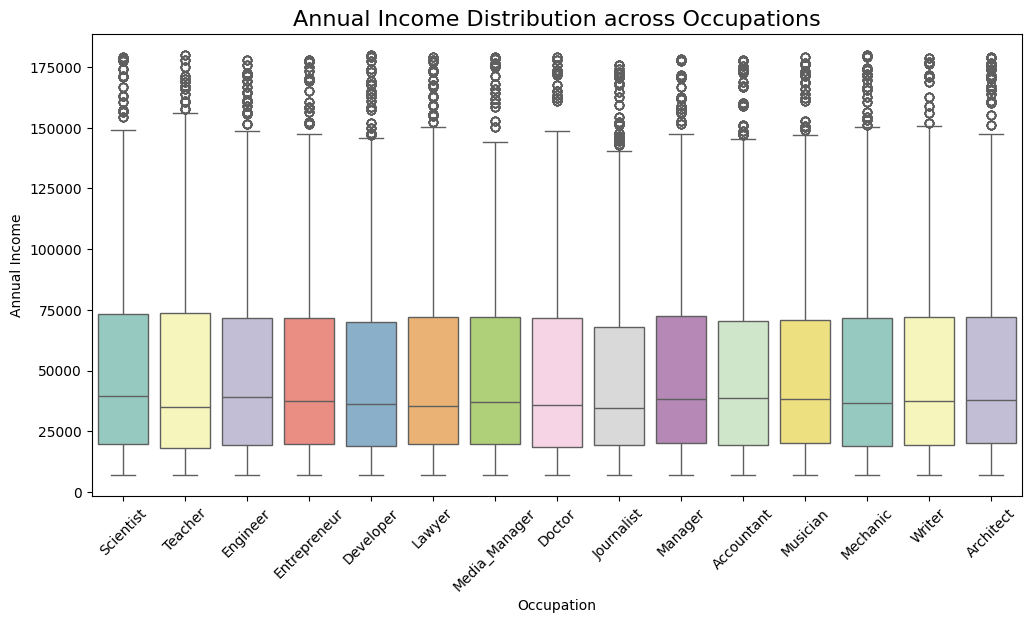

In [16]:
# Chart - 3 visualization code
# Occupation vs Annual income
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Occupation", y="Annual_Income", palette="Set3")

plt.title("Annual Income Distribution across Occupations", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Annual Income")
plt.xlabel("Occupation")
plt.show()

##### 1. Why did you pick the specific chart?

Which job categories are more financially stable and thus more reliable for credit approvals or higher loan limits.

##### 2. What is/are the insight(s) found from the chart?

The chart helps identify which occupations are more financially reliable and which are riskier

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If a large proportion of customers belong to lower-income or unstable-occupation groups, the business may face loss

#### Chart - 4

/tmp/ipython-input-4143877377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df, palette='Set2')


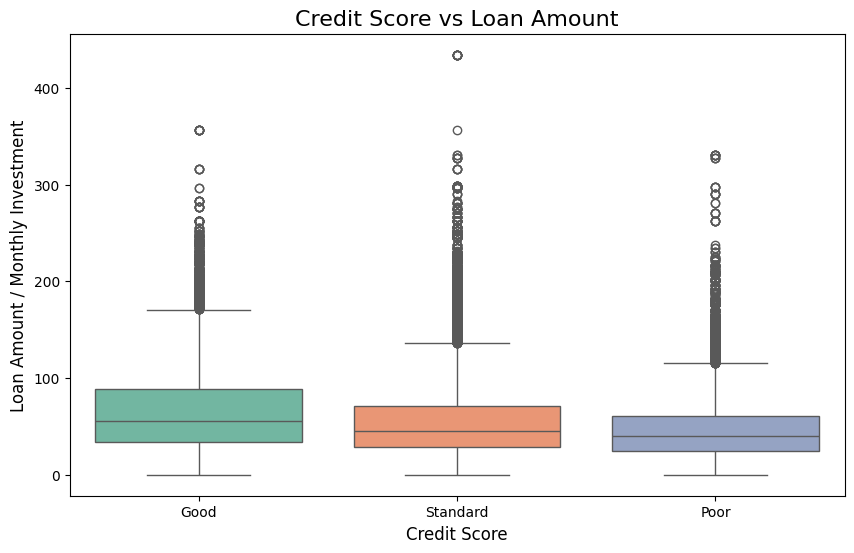

In [17]:
# Chart - 4 visualization code
# Plot Credit Score vs Loan Amount
plt.figure(figsize=(10,6))
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df, palette='Set2')

plt.title("Credit Score vs Loan Amount", fontsize=16)
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Loan Amount / Monthly Investment", fontsize=12)
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Visualize the relationship between Credit Score and the Loan Amount customers have taken

##### 2. What is/are the insight(s) found from the chart?

Customers with higher credit scores are typically approved for larger loans, and whether lower scores restrict loan amounts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in reducing default risk by preventing large loans to low-score customers.

#### Chart - 5

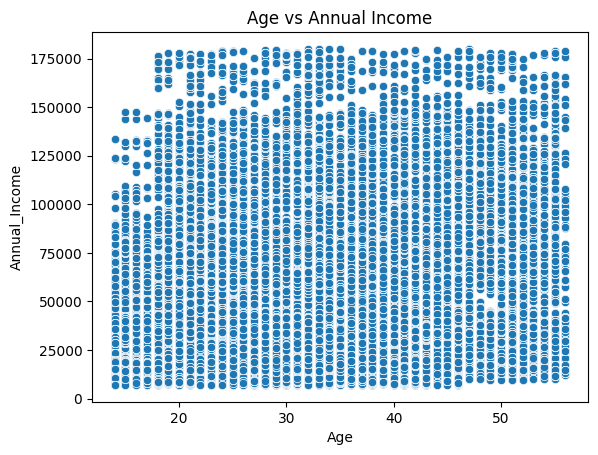

In [18]:
# Chart - 5 visualization code
# Age vs Annual Income
sns.scatterplot(x='Age', y='Annual_Income', data=df,alpha= 1)
plt.title("Age vs Annual Income")
plt.show()

##### 1. Why did you pick the specific chart?

Relationship between age & income.

##### 2. What is/are the insight(s) found from the chart?

Income rises with age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Suggests income-based credit limits.

#### Chart - 6

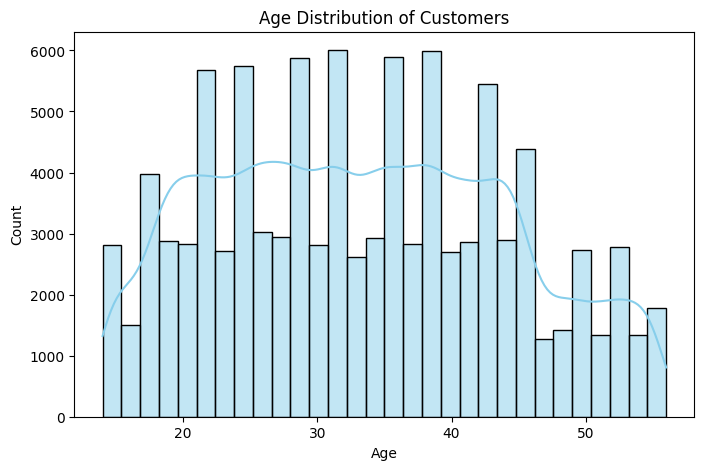

In [19]:
# Chart - 6 visualization code
# Distribution of age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=30, kde= True,color='skyblue')
plt.title("Age Distribution of Customers")
plt.show()

##### 1. Why did you pick the specific chart?

Age is a critical demographic factor influencing credit and repayment ability.

##### 2. What is/are the insight(s) found from the chart?

Most customers are between 25 - 45 years old.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in targeting working-age customers

#### Chart - 7

/tmp/ipython-input-942646866.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation', data=df, palette='Set3')


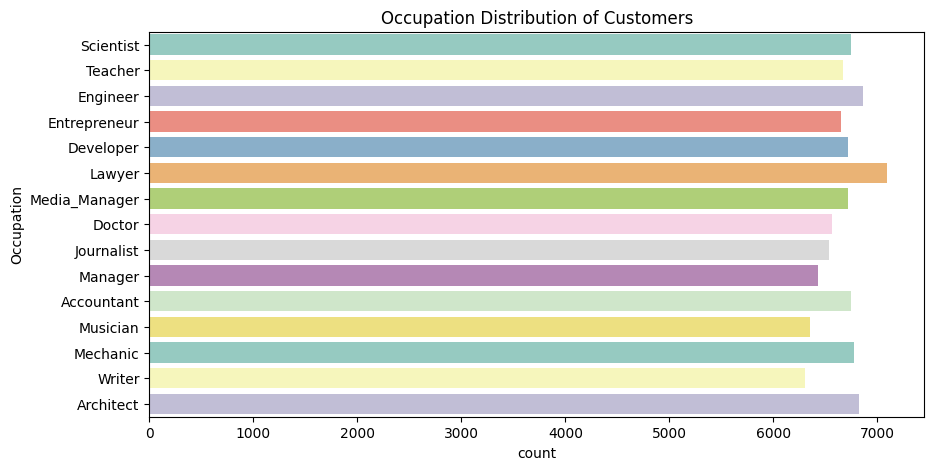

In [20]:
# Chart - 7 visualization code
# occupation distribution
plt.figure(figsize=(10,5))
sns.countplot(y='Occupation', data=df, palette='Set3')
plt.title("Occupation Distribution of Customers")
plt.show()

##### 1. Why did you pick the specific chart?

Occupation affects income & repayment.

##### 2. What is/are the insight(s) found from the chart?

Customer of every occupation is most likely equal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Stable occupations reduce risk.

#### Chart - 8

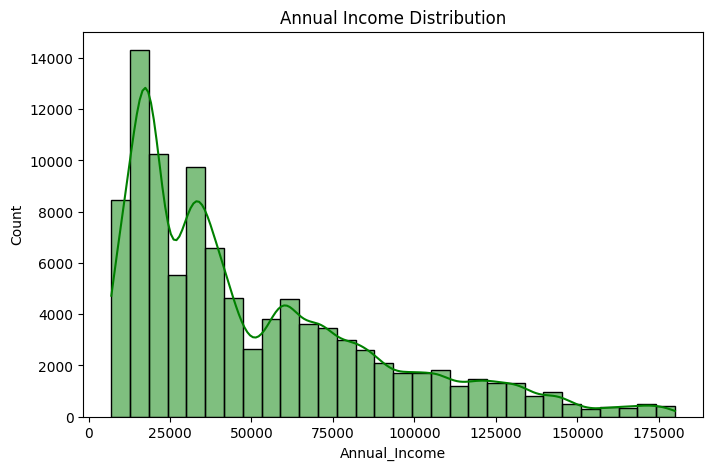

In [21]:
# Chart - 8 visualization code
# Annual income distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Annual_Income'], bins=30, kde=True, color='green')
plt.title("Annual Income Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

To see income levels.

##### 2. What is/are the insight(s) found from the chart?

Most customers earn between 25000 - 75000 annually.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Target mid-income groups for credit cards/loans.

#### Chart - 9

/tmp/ipython-input-3241456965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, palette='husl')


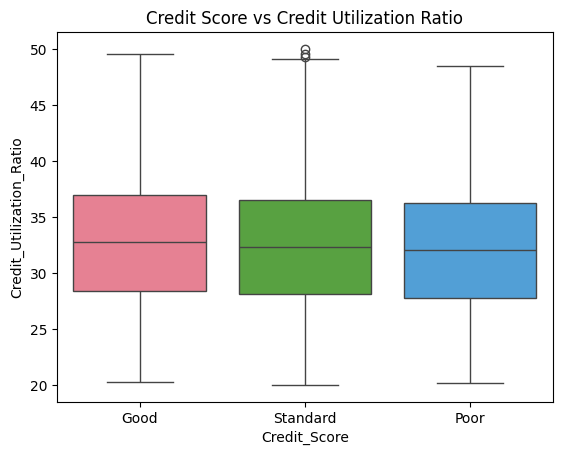

In [22]:
# Chart - 9 visualization code
# Credit Score vs Credit Utilization Ratio
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, palette='husl')
plt.title("Credit Score vs Credit Utilization Ratio")
plt.show()

##### 1. Why did you pick the specific chart?

Utilization impacts risk.

##### 2. What is/are the insight(s) found from the chart?

All three credit score have most likely same credit utilization ratio.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Detect risky profiles early.

#### Chart - 10

/tmp/ipython-input-997731740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, palette='muted')


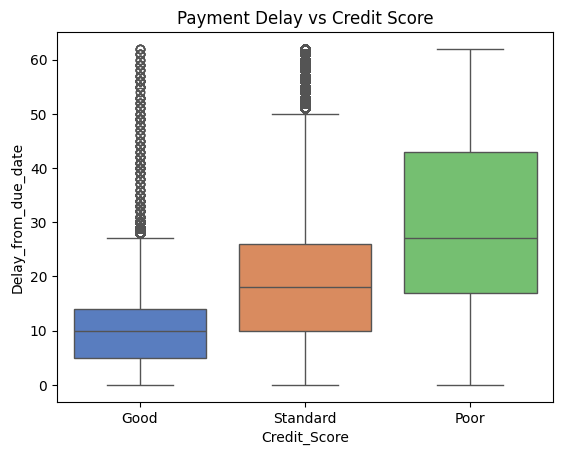

In [23]:
# Chart - 10 visualization code
# Payment Delay vs Credit Score
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, palette='muted')
plt.title("Payment Delay vs Credit Score")
plt.show()

##### 1. Why did you pick the specific chart?

Payment delays ruin credit score.

##### 2. What is/are the insight(s) found from the chart?

Poor credit scores means higher delays.
Good credit score means less delay.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Warning system for loan.

#### Chart - 11

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


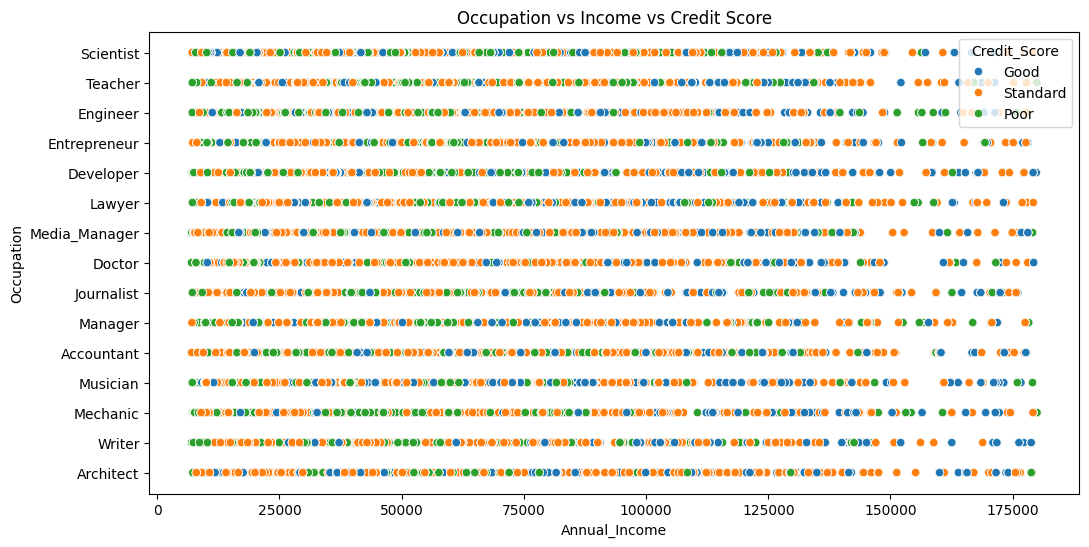

In [24]:
# Chart - 11 visualization code
#Occupation vs Income vs Credit Score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Annual_Income', y='Occupation', hue='Credit_Score', data=df)
plt.title("Occupation vs Income vs Credit Score")
plt.show()

##### 1. Why did you pick the specific chart?

Check salary-occupation-credit relation.

##### 2. What is/are the insight(s) found from the chart?

high income, good credit score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focus on low-income low-score customers.

#### Chart - 12

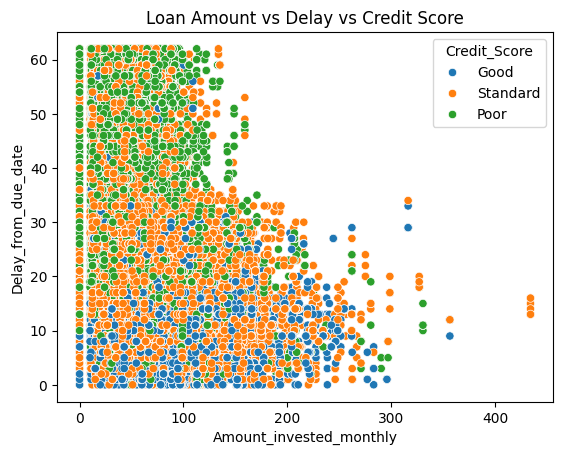

In [25]:
# Chart - 12 visualization code
#Loan Amount vs Delay vs Credit Score
sns.scatterplot(x='Amount_invested_monthly', y='Delay_from_due_date', hue='Credit_Score', data=df)
plt.title("Loan Amount vs Delay vs Credit Score")
plt.show()

##### 1. Why did you pick the specific chart?

See if loan size causes delays.

##### 2. What is/are the insight(s) found from the chart?

More delays for poor credit holders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Cap loans for risky customers.

#### Chart - 13

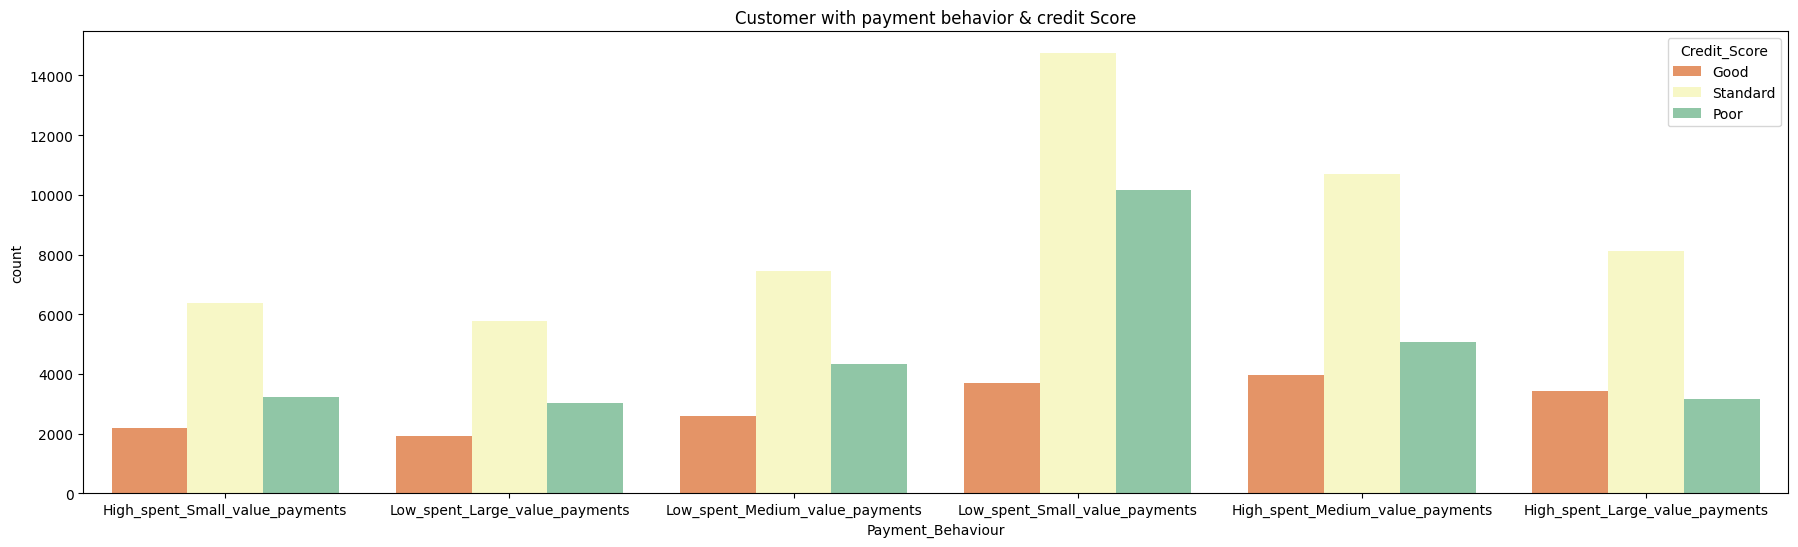

In [26]:
# Chart - 13 visualization code
# Count the customer with payment behavior & credit Score
plt.figure(figsize=(22,6))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df, palette='Spectral')
plt.title("Customer with payment behavior & credit Score")
plt.show()

##### 1. Why did you pick the specific chart?

Behaviour of customers.

##### 2. What is/are the insight(s) found from the chart?

Low spent customers have standard credit score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Better risk segmentation.

#### Chart - 14 - Correlation Heatmap

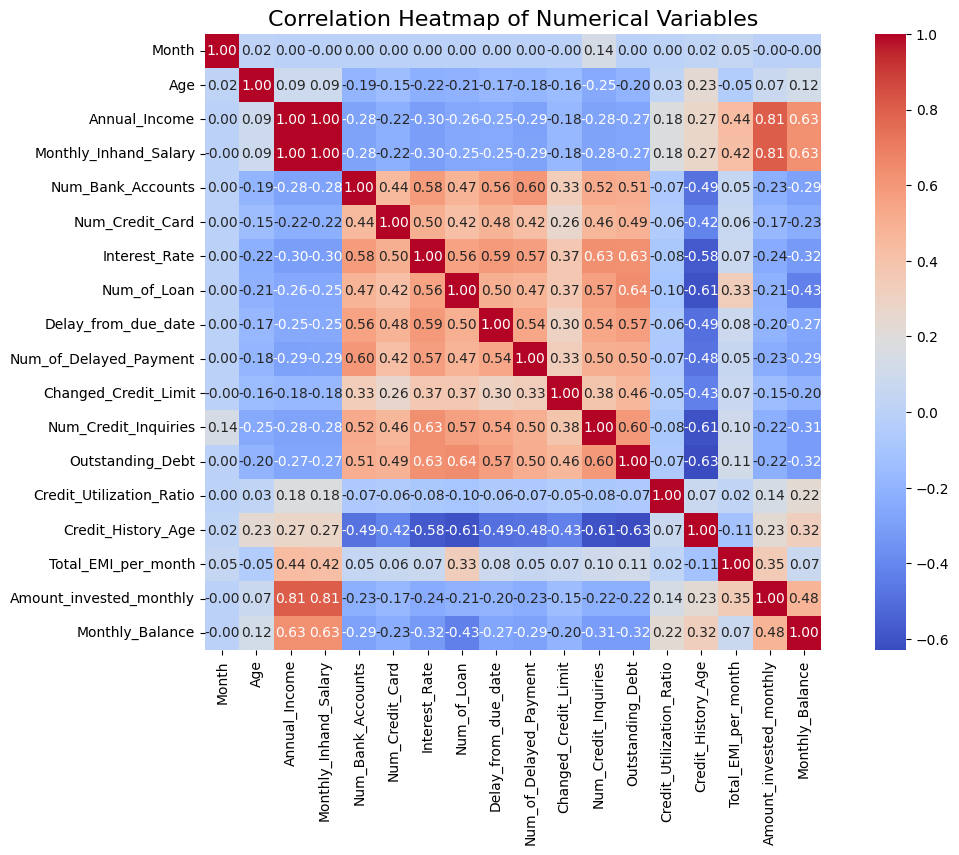

In [27]:
# Correlation Heatmap visualization code
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation Matrix
plt.figure(figsize=(14,8))
corr = numeric_df.corr()

sns.heatmap(
    corr,
    annot=True,        # show correlation values
    fmt=".2f",         # decimal formatting
    cmap="coolwarm",   # color palette
    cbar=True,
    square=True
)

plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

It shows how strongly variables are related (positive/negative correlation).

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlation expected between Annual_Income and Monthly_Inhand_Salary.

#### Chart - 15 - Pair Plot

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

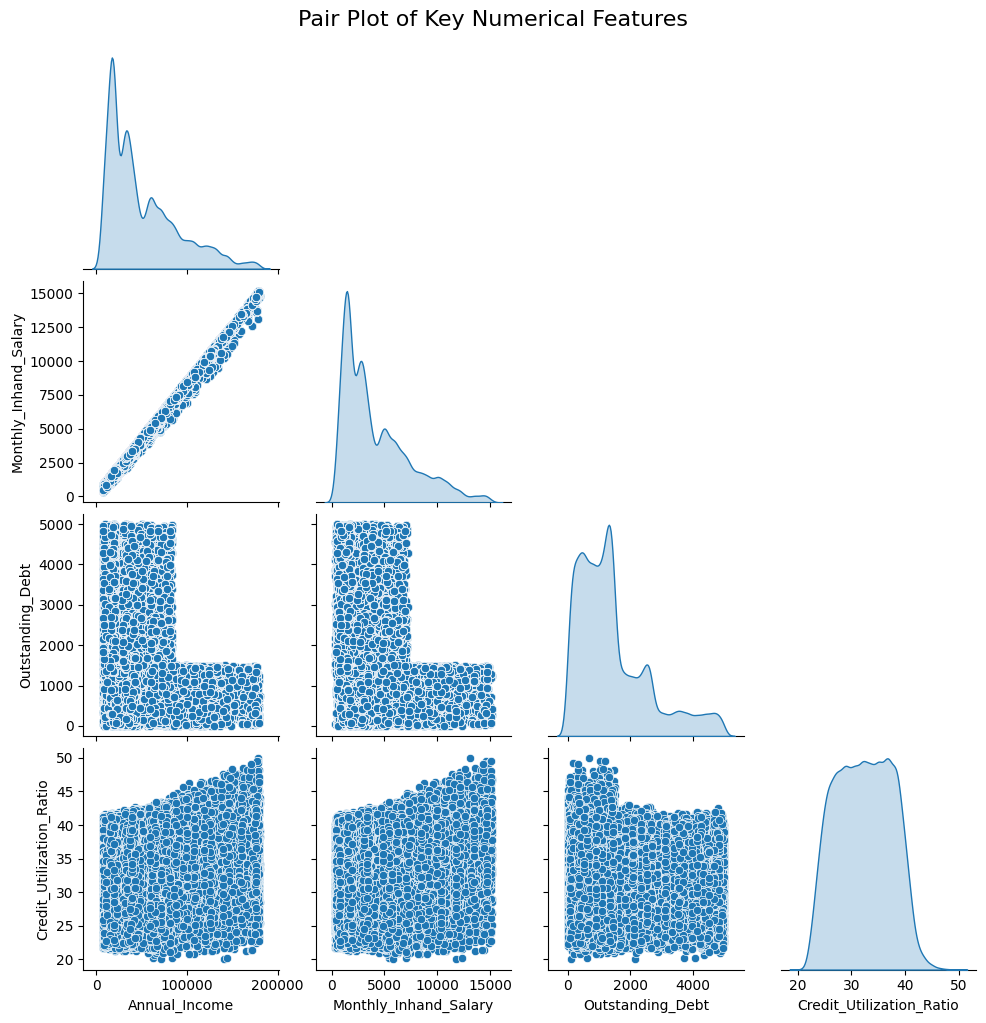

In [28]:
# Pair Plot visualization code
# Select only a few important numerical columns (to avoid clutter)
num_cols = ["Annual_Income", "Monthly_Inhand_Salary", "Outstanding_Debt", "Credit_Utilization_Ratio"]

# Pairplot
sns.pairplot(df[num_cols], diag_kind="kde", corner=True, palette="Set2")

plt.suptitle("Pair Plot of Key Numerical Features", y=1.02, fontsize=16)
plt.show()



##### 1. Why did you pick the specific chart?

Compare every numeric feature with every other one at the same time.

##### 2. What is/are the insight(s) found from the chart?

Spot linear or non-linear relationships

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Is Payment_Behaviour independent of Credit_Score?

H₀: Payment_Behaviour and Credit_Score are independent (no association).

H₁: Payment_Behaviour and Credit_Score are associated.

#### 2. Perform an appropriate statistical test.

In [67]:
# Perform Statistical Test to obtain P-Value
ct = pd.crosstab(df['Payment_Behaviour'].fillna('NA'), df['Credit_Score'].fillna('NA'))
from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(ct)
print("Chi2:", chi2, " p:", p, " degrees of freedom:", dof)

Chi2: 1540.3973697187996  p: 0.0  degrees of freedom: 10


##### Which statistical test have you done to obtain P-Value?

Chi-square test

##### Why did you choose the specific statistical test?

Both variables are categorical, so the chi-square test checks whether their observed joint distribution differs from what would be expected under independence.

**Conclusion (α = 0.05)**

p ≪ 0.05 → Reject H₀.
There is a statistically significant association between Payment_Behaviour and Credit_Score.

Chi-Square Statistic → higher values indicate stronger deviation from independence.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Correlation between Number_of_Loan and Interest_Rate

H₀: There is no significant correlation between Num_of_Loan and Interest_Rate.

H₁: There is a significant correlation between Num_of_Loan and Interest_Rate.

#### 2. Perform an appropriate statistical test.

In [70]:
# Perform Statistical Test to obtain P-Value
data = df[['Num_of_Loan', 'Interest_Rate']].dropna()
# Pearson correlation
pearson_corr, pearson_p = stats.pearsonr(data['Num_of_Loan'], data['Interest_Rate'])

# Spearman correlation
spearman_corr, spearman_p= stats.spearmanr(data['Num_of_Loan'], data['Interest_Rate'])

print("Pearson Correlation:", pearson_corr, "  p-value:", pearson_p )
print("Spearman Correlation:", spearman_corr, " p-value:", spearman_p)

Pearson Correlation: 0.5591562300006891   p-value: 0.0
Spearman Correlation: 0.5318646176921223  p-value: 0.0


##### Which statistical test have you done to obtain P-Value?



1.Pearson

2.Spearman



##### Why did you choose the specific statistical test?

Pearson → checks linear correlation.

Spearman → checks monotonic correlation.

**Conclusion (α = 0.05)**

p < 0.05, reject H₀ → correlation is significant.

Check correlation coefficient (r):

0.0 - 0.3 → weak

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Occupation vs Credit Score

H₀: Occupation and Credit Score are independent (no association).

H₁: Occupation and Credit Score are associated (dependent).

#### 2. Perform an appropriate statistical test.

In [71]:
# Perform Statistical Test to obtain P-Value
contingency_table = pd.crosstab(df['Occupation'], df['Credit_Score'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi2:", chi2, " p:", p, " degrees of freedom:", dof)

Chi2: 180.68588839512742  p: 2.907103747503745e-24  degrees of freedom: 28


##### Which statistical test have you done to obtain P-Value?

Chi-square test

##### Why did you choose the specific statistical test?

we need to test association between two categorical variables

**Conclusion (α = 0.05)**

p ≥ 0.05 → fail to reject H₀ → No significant association.

Chi-Square Statistic → higher values indicate stronger deviation from independence.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction

#### 2. Lower Casing

In [36]:
# Lower Casing

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords

In [40]:
# Remove White spaces

#### 6. Rephrase Text

In [41]:
# Rephrase Text

#### 7. Tokenization

In [42]:
# Tokenization

#### 8. Text Normalization

In [43]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [44]:
# POS Taging

#### 10. Text Vectorization

In [45]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [47]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [48]:
# Transform Your data

### 6. Data Scaling

In [49]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [50]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [52]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [53]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [58]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [61]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [62]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [63]:
!pip install gdown -q

In [64]:
# Download the dataset from Google Drive
# The file ID is extracted from the shared link
file_id = '140RGV1jfGe2MDK5ROsKBX5f3Da70Eq3A'
file_name = 'dataset.csv' # You can name your file here

!gdown --id {file_id} -O {file_name}

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=140RGV1jfGe2MDK5ROsKBX5f3Da70Eq3A
To: /content/dataset.csv
100% 30.8M/30.8M [00:00<00:00, 60.6MB/s]


In [65]:
# Load Dataset
data = pd.read_csv(file_name)